In [ ]:
from natural_bot_tk.natural_input import Mouse


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyautogui

m = Mouse(pyautogui.size())

In [2]:
#m.move_to((500,600), max_noise_deviation=5, noisiness=0.03)

In [3]:
img_size = np.array((1920,1080))
origin = np.array((420,585))
dest = np.array((1495, 585))

In [4]:
p = abs(dest[1]-origin[1])/abs(dest[0]-origin[0])
mult_x = np.sign(dest[0]-origin[0])
mult_y = np.sign(dest[1]-origin[1])

points_line = []
for step in range(0, abs(origin[0] - dest[0]), 30):
    points_line.append((origin[0] + mult_x*step, origin[1] + mult_y*step*p))
points_line.append(dest)
points_line = np.array(points_line)

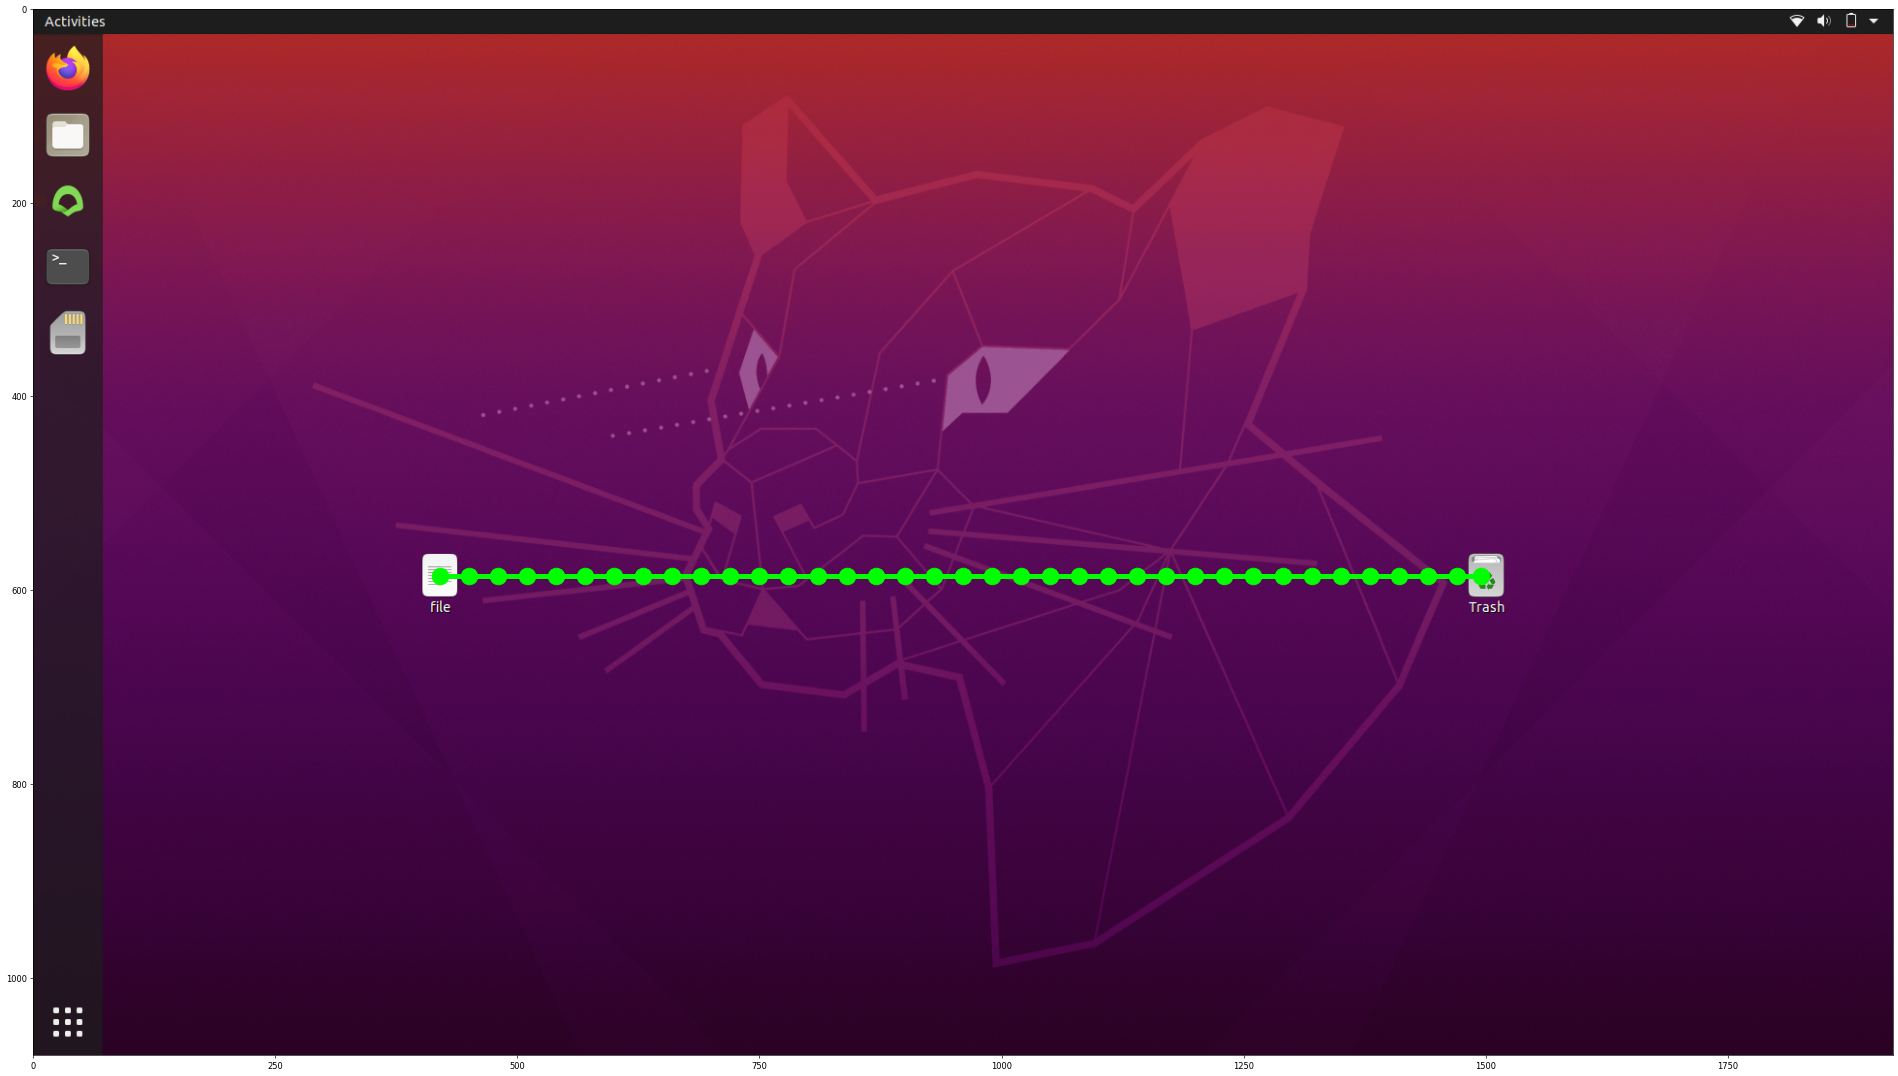

In [5]:
img = plt.imread("background.png")
fig, ax = plt.subplots(figsize=(40, 60), dpi=60)
ax.imshow(img, extent=[0, 1920, 1080,0 ])
ax.plot(points_line[:,0], points_line[:,1], marker='o', color='lime', linewidth=6, markersize=20)
plt.show()

In [13]:
p_0 = np.array([origin[0]/img_size[0], origin[1]/img_size[1]])
p_3 = np.array([dest[0]/img_size[0], dest[1]/img_size[1]])
np.random.seed(12345)
points_curve_line = m.generate_cubic_bezier(p_0, p_3, max_deviation=0.5, n_steps=60, linear_progression=True)
np.random.seed()

points_curve_line[:, 0] *= img_size[0]
points_curve_line[:, 1] *= img_size[1]

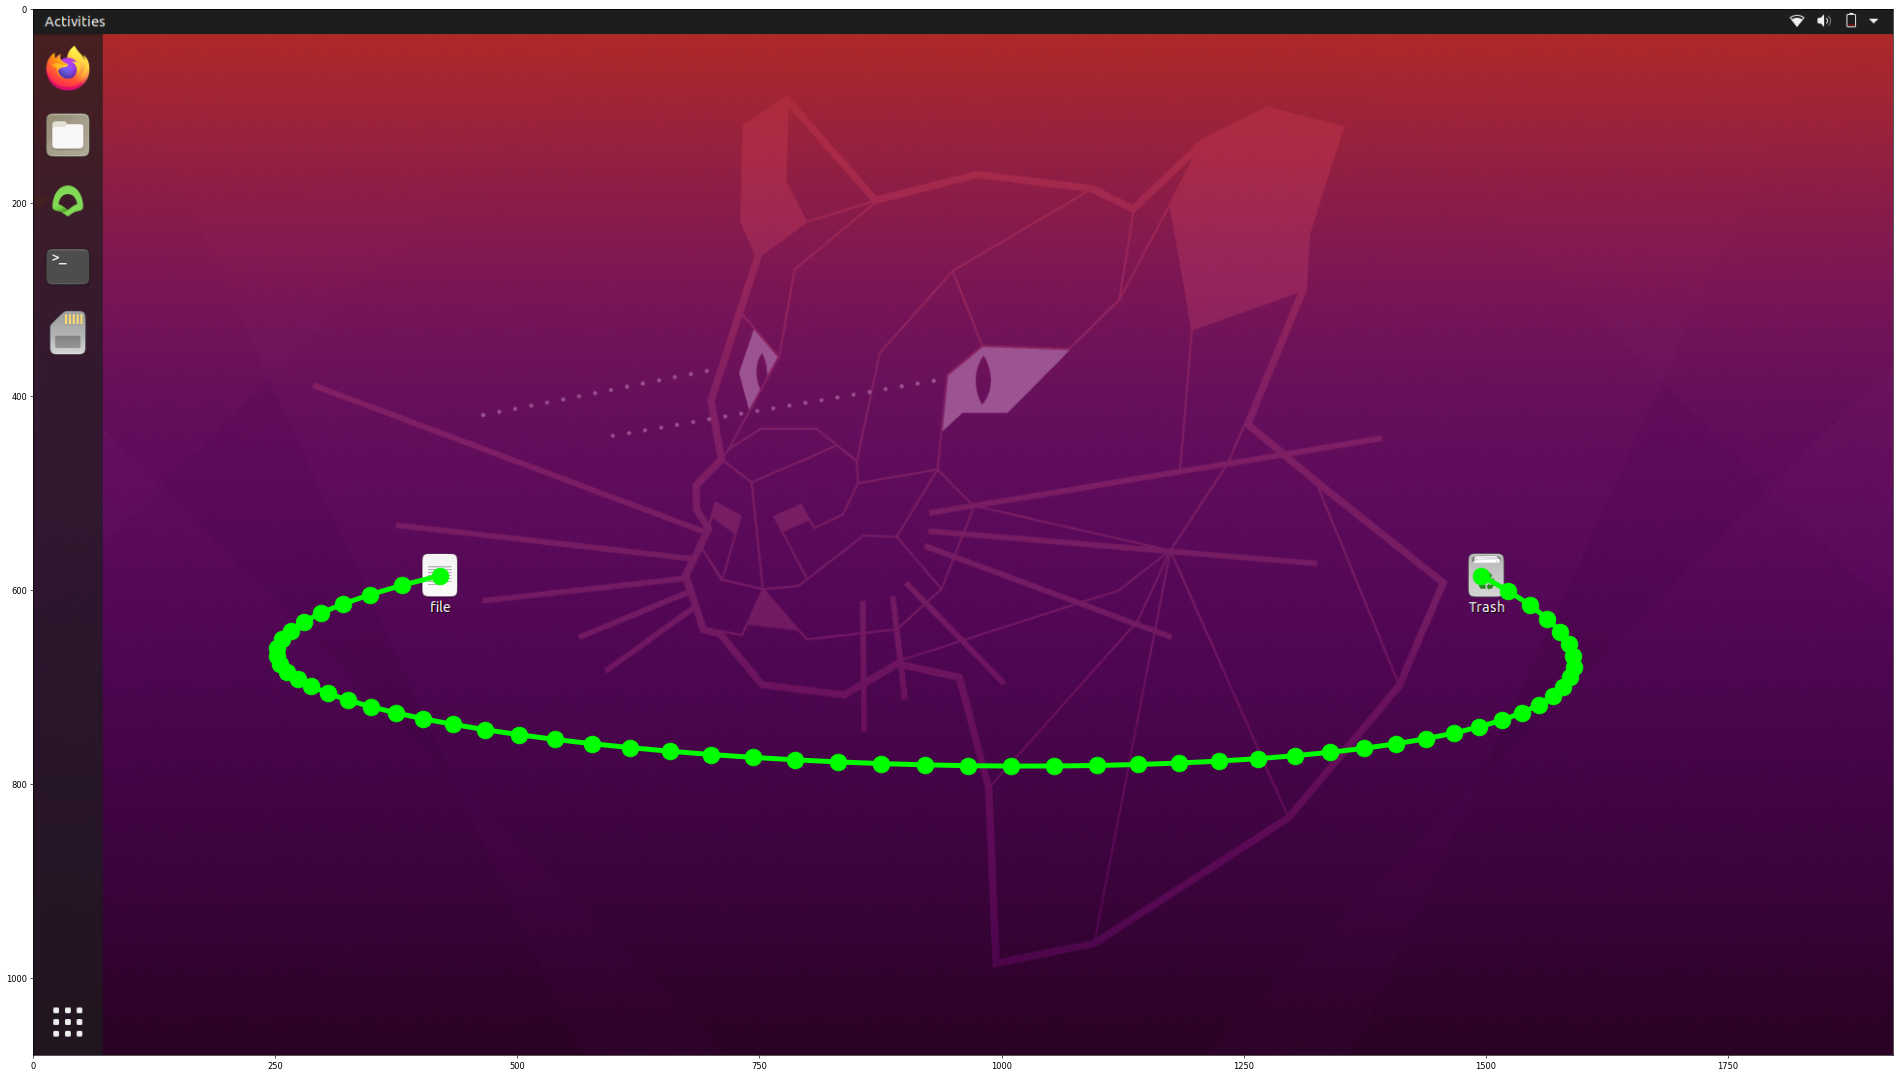

In [14]:
img = plt.imread("background.png")
fig, ax = plt.subplots(figsize=(40, 60), dpi=60)
ax.imshow(img, extent=[0, 1920, 1080, 0])
ax.plot(points_curve_line[:,0], points_curve_line[:,1], marker='o', color='lime', linewidth=6, markersize=20)
plt.show()

In [20]:
p_0 = np.array([origin[0]/img_size[0], origin[1]/img_size[1]])
p_3 = np.array([dest[0]/img_size[0], dest[1]/img_size[1]])
np.random.seed(12345)
points_curve = m.generate_cubic_bezier(p_0, p_3, max_deviation=0.5, n_steps=90, linear_progression=False)
np.random.seed()

points_curve[:, 0] *= img_size[0]
points_curve[:, 1] *= img_size[1]

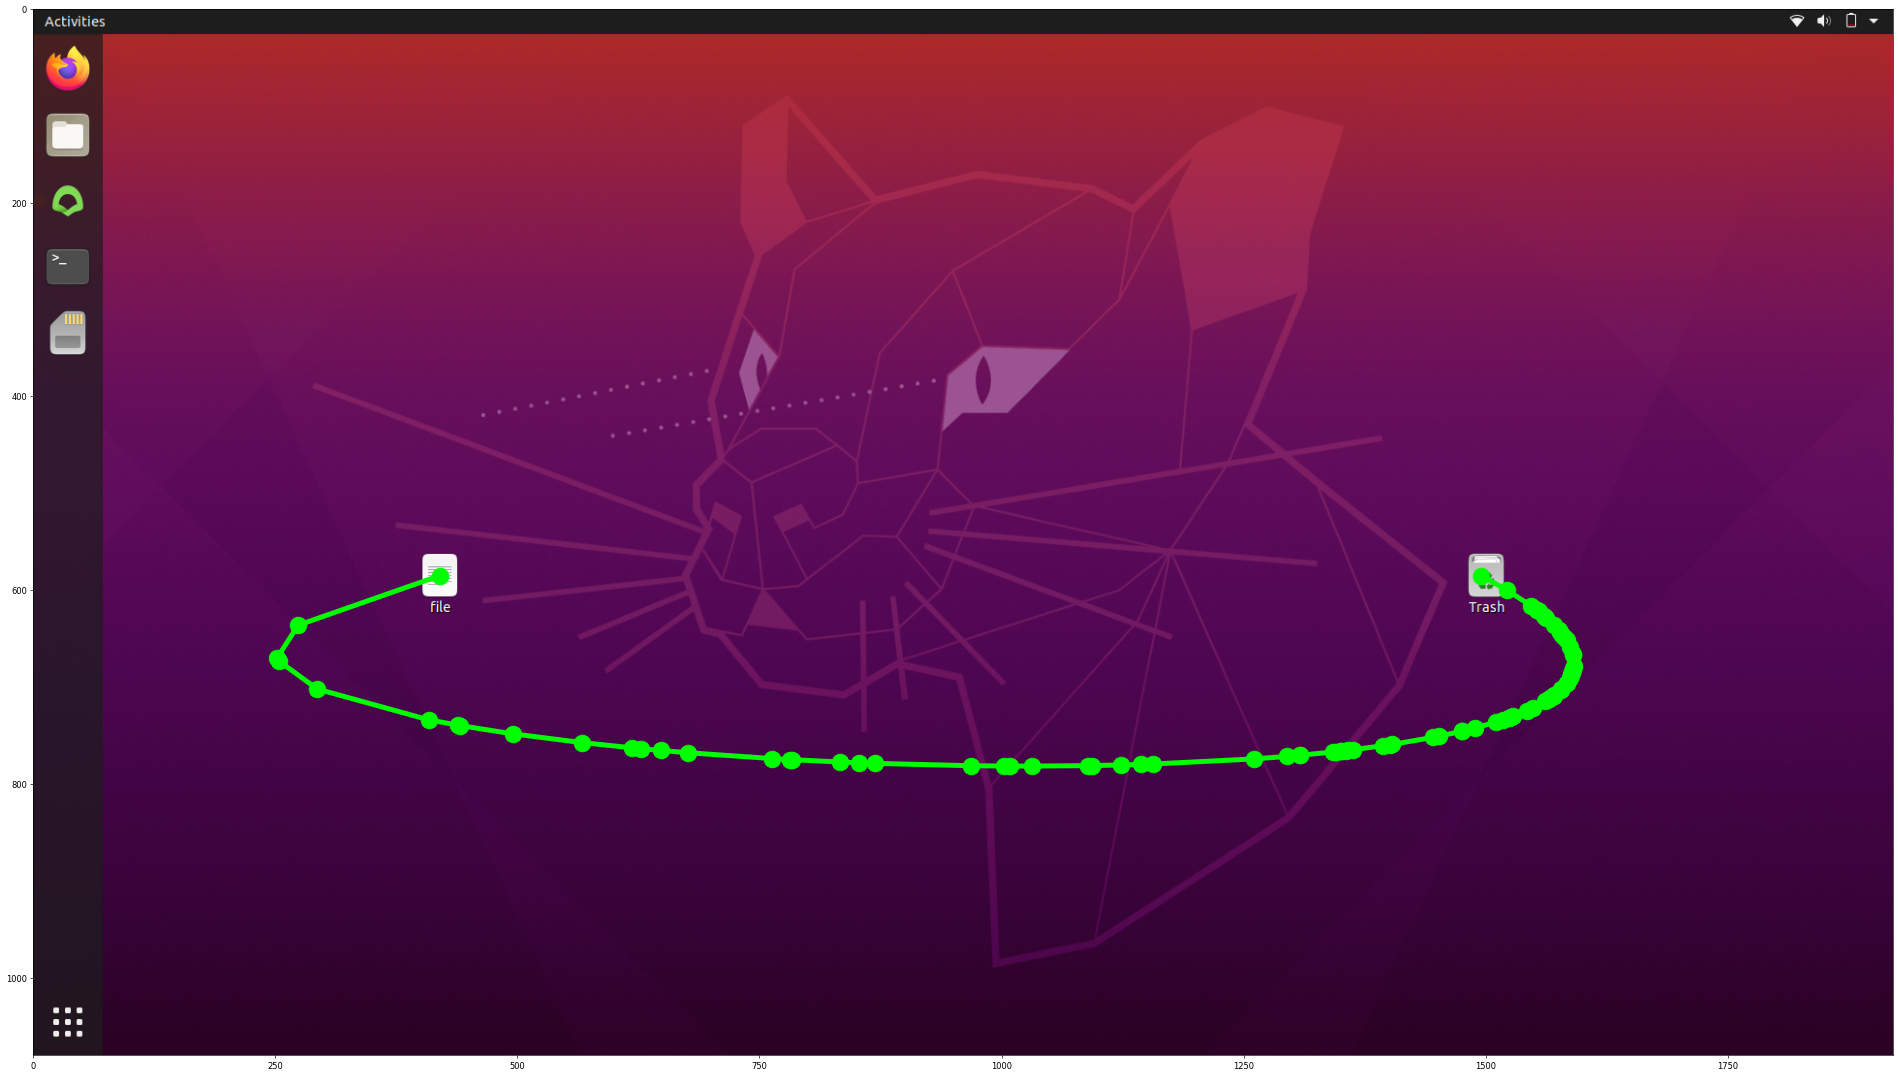

In [21]:
img = plt.imread("background.png")
fig, ax = plt.subplots(figsize=(40, 60), dpi=60)
ax.imshow(img, extent=[0, 1920, 1080, 0])
ax.plot(points_curve[:,0], points_curve[:,1], marker='o', color='lime', linewidth=6, markersize=20)
plt.show()

In [36]:
noisy = m.add_noise(points_curve, 0.9, 0.6)

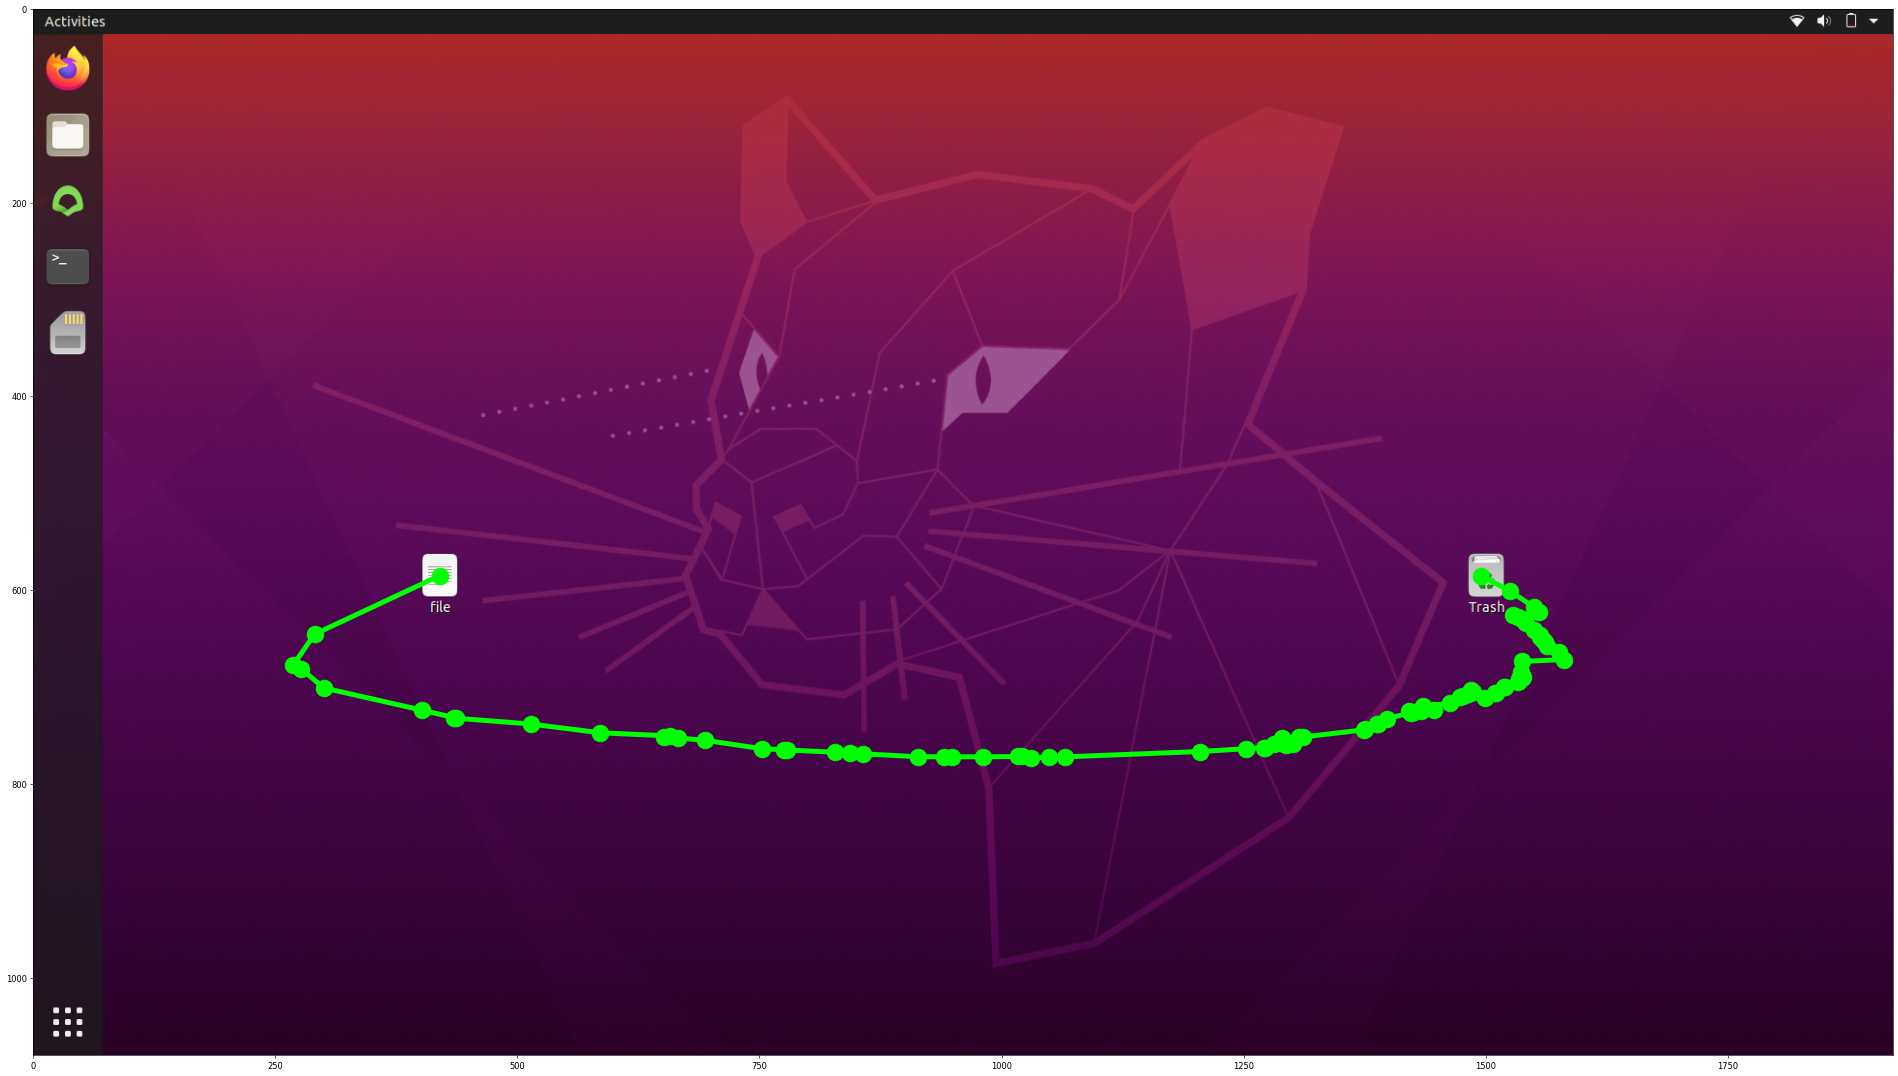

In [37]:
img = plt.imread("background.png")
fig, ax = plt.subplots(figsize=(40, 60), dpi=60)
ax.imshow(img, extent=[0, 1920, 1080, 0])
ax.plot(noisy[:,0], noisy[:,1], marker='o', color='lime', linewidth=6, markersize=20)
plt.show()